# EFTfitter.jl - Empty Template

In [1]:
using EFTfitter
using BAT            # for sampling
using IntervalSets   # for specifying the prior
using Distributions  # for specifying the prior
using Plots          # for plotting

### Parameters

In [2]:
parameters = BAT.NamedTupleDist(
    p1 = -2..2,
)

ValueShapes.NamedTupleDist{(:p1,),Tuple{Uniform{Float64}},Tuple{ValueShapes.ValueAccessor{ValueShapes.ScalarShape{Real}}}}(
_internal_distributions: (p1 = Uniform{Float64}(a=-2.0, b=2.0),)
_internal_shape: ValueShapes.NamedTupleShape{(:p1,),Tuple{ValueShapes.ValueAccessor{ValueShapes.ScalarShape{Real}}}}((p1 = ValueShapes.ValueAccessor{ValueShapes.ScalarShape{Real}}(ValueShapes.ScalarShape{Real}(), 0, 1),), 1)
)


### Observables

In [3]:
function observable1(params)
    return params.p1
end

observable1 (generic function with 1 method)

### Measurements

In [4]:
measurements = (
    Meas1 = Measurement(observable1, 0.0, uncertainties = (unc1 = 0.1,), active=true),

    #MeasDist = MeasurementDistribution(obs_array, values_array, uncertainties = (unc1 = unc1_array,), active=false),
)

(Meas1 = Measurement(Observable(Main.##491.observable1, -Inf, Inf), 0.0, (unc1 = 0.1,), true),)

### Correlations

In [5]:
correlations = (
    unc1 = NoCorrelation(active=true),
)

#corr_matrix = to_correlation_matrix(measurements,
#  (:Meas1, :Meas2, 0.1),
#)

(unc1 = NoCorrelation
  active: Bool true
,)

create an `EFTfitterModel` object:

In [6]:
model = EFTfitterModel(parameters, measurements, correlations)

EFTfitterModel(ValueShapes.NamedTupleDist{(:p1,),Tuple{Uniform{Float64}},Tuple{ValueShapes.ValueAccessor{ValueShapes.ScalarShape{Real}}}}(
_internal_distributions: (p1 = Uniform{Float64}(a=-2.0, b=2.0),)
_internal_shape: ValueShapes.NamedTupleShape{(:p1,),Tuple{ValueShapes.ValueAccessor{ValueShapes.ScalarShape{Real}}}}((p1 = ValueShapes.ValueAccessor{ValueShapes.ScalarShape{Real}}(ValueShapes.ScalarShape{Real}(), 0, 1),), 1)
)
, (Meas1 = Measurement(Observable(Main.##491.observable1, -Inf, Inf), 0.0, (unc1 = 0.1,), true),), NamedTuple(), (unc1 = Correlation([1.0], true),), nothing)

create posterior distribution:

In [7]:
posterior = PosteriorDensity(model);

sample the posterior distribution with BAT.jl:

In [8]:
algorithm = MCMCSampling(mcalg = MetropolisHastings(), nsteps = 10^5, nchains = 4)
samples = bat_sample(posterior, algorithm).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Using tranform algorithm PriorSubstitution()
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/chain_pool_init.jl:56
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/chain_pool_init.jl:174
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:35
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 4 converged.
└ @ BAT /home/cornelius/Projects/julia/BAT.jl/src/samplers/mcmc/multi_cycle_burnin.jl:65
┌ Info: MCMC Tunin

create and display a `SampledDensity` object for a quick overview of results:

In [9]:
sd = SampledDensity(posterior, samples)
display(sd)

 plot the posterior distribution:

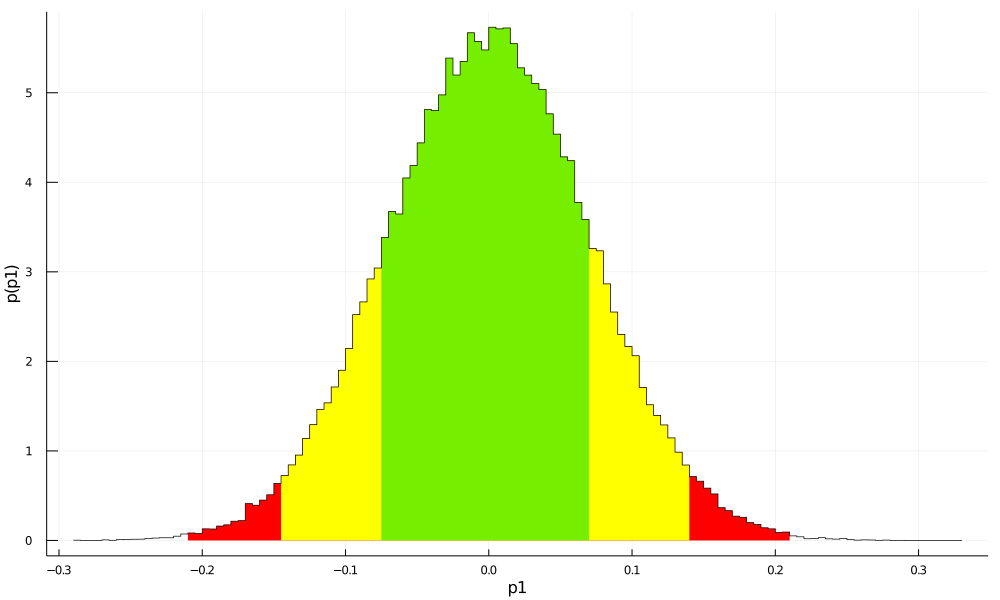

In [10]:
p = plot(samples)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*